In [1]:
import pandas as pd
import os

# Prompt user to enter file name
file_name = input("Enter the file name: ").lower() + '.csv'

# Check if file exists
if not os.path.isfile(file_name):
    print("File not found, please enter the correct file name")
else:
# the try except block
    try:
        # Load CSV file into a pandas DataFrame
        df = pd.read_csv(file_name)
    except csv.Error:
        # Handle errors that occur while reading the CSV file
        print("An error occurred while reading the file")


Enter the file name: airbnb_uk_2022


In [3]:

import matplotlib.pyplot as plt  

fig = plt.figure(figsize=(15,8))

bedrooms = ['1', '2', '3', '4', '5', '6']
num   = [df ['1'].sum(), df ['2'].sum(), df ['3'].sum(), 
         df ['4'].sum(), df ['5'].sum(), df ['6'].sum()]
plt.axis("equal")
plt.pie(salesData, labels=labels, autopct='%1.1f%%')
plt.legend(loc='lower right')
plt.title('num')
plt.show()

KeyError: '1'

<Figure size 1500x800 with 0 Axes>

In [11]:
bedroom_counts = df['bedrooms'].value_counts().sort_index()
print(bedroom_counts)


1     5593
2     1756
3      741
4      263
5       69
6       15
7        1
10       1
Name: bedrooms, dtype: int64


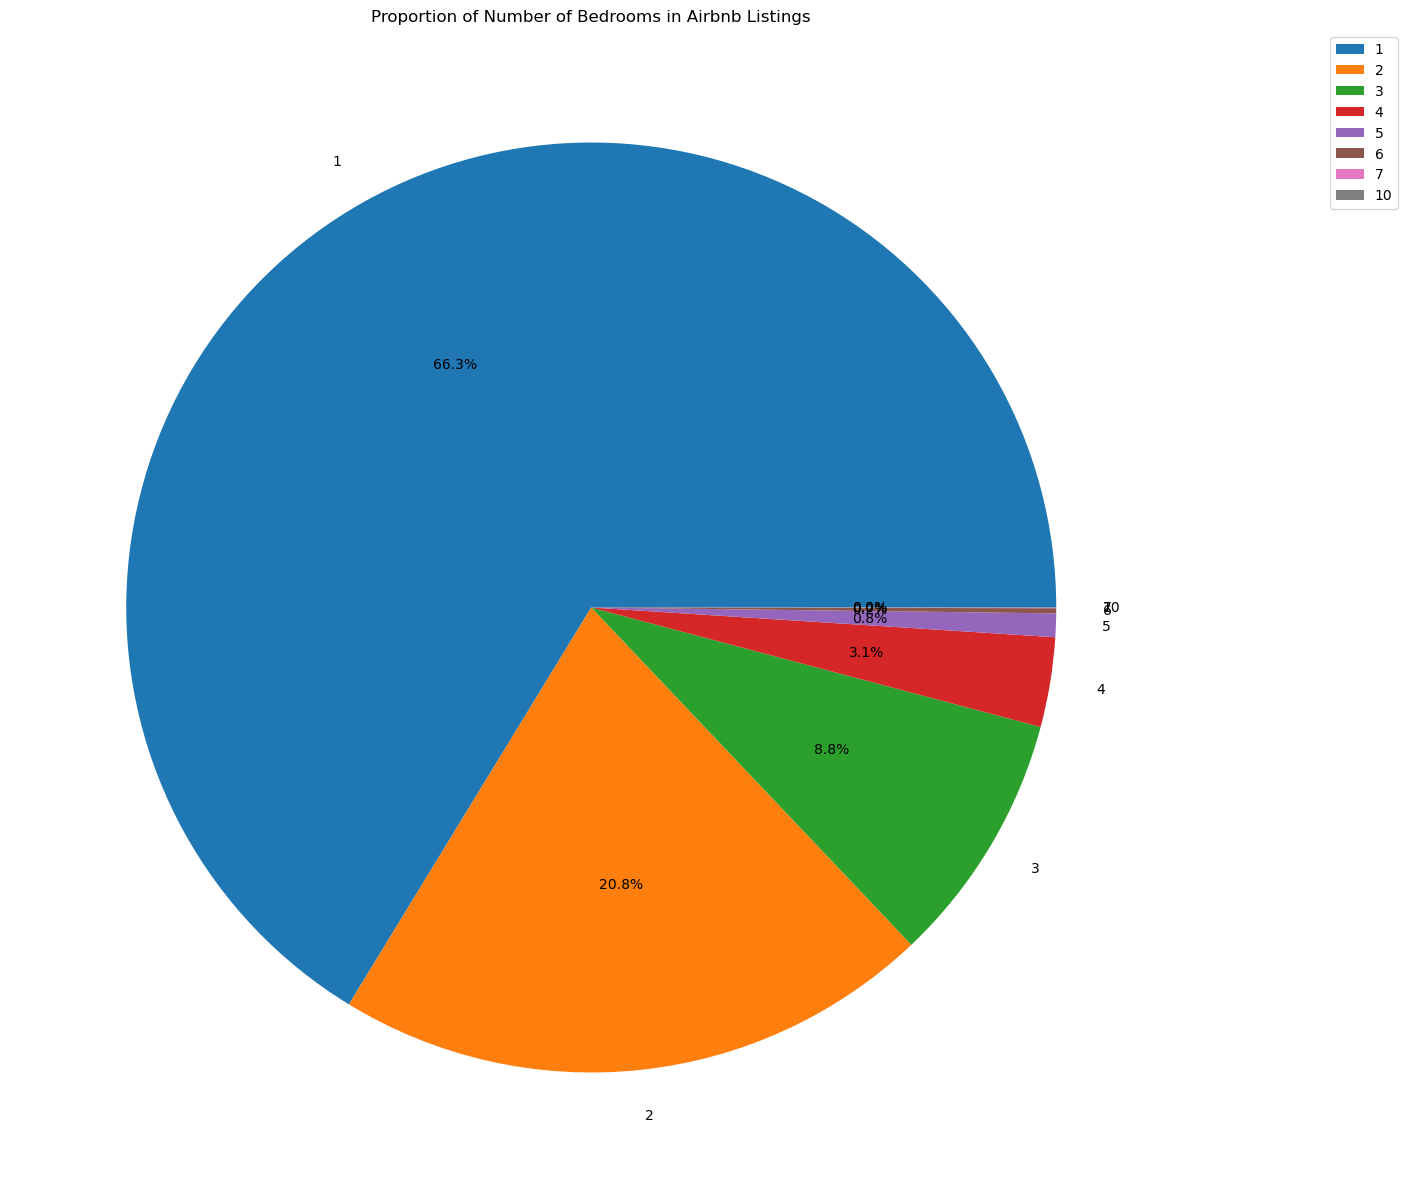

In [4]:
import matplotlib.pyplot as plt  

fig = plt.figure(figsize=(15, 15))

bedrooms = ['1', '2', '3', '4', '5', '6', '7', '10']
count= [df['bedrooms'].eq(1).sum(), df['bedrooms'].eq(2).sum(), 
       df['bedrooms'].eq(3).sum(), df['bedrooms'].eq(4).sum(),
       df['bedrooms'].eq(5).sum(), df['bedrooms'].eq(6).sum(),
       df['bedrooms'].eq(7).sum(), df['bedrooms'].eq(10).sum()]

plt.axis("equal")
plt.pie(count, labels=bedrooms, autopct='%1.1f%%')
plt.legend(loc="best",bbox_to_anchor=(1.2,1))
plt.title('Proportion of Number of Bedrooms in Airbnb Listings')
plt.show()


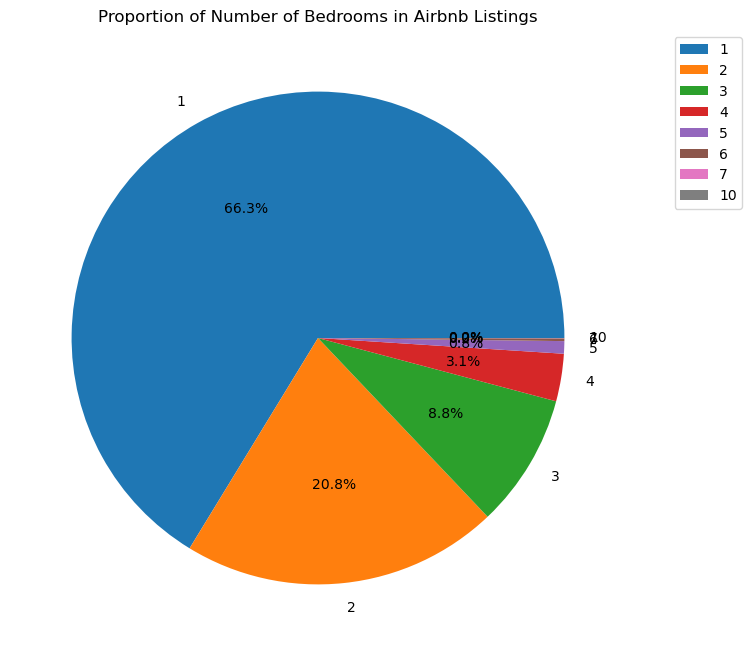

In [6]:
import matplotlib.pyplot as plt

# Data
bedrooms = ['1', '2', '3', '4', '5', '6', '7', '10']
counts = [5593, 1756, 741, 263, 69, 15, 1, 1]

# Create pie chart
fig = plt.figure(figsize=(8, 8))
plt.pie(counts, labels=bedrooms, autopct='%1.1f%%')
plt.title('Proportion of Number of Bedrooms in Airbnb Listings')
plt.legend(loc="best",bbox_to_anchor=(1.2,1))

plt.show()


In [7]:
# check the room types and their numbers
room_type_counts = df['room_type'].value_counts().sort_index()
print(room_type_counts)

Hotel room         1
Private room    3010
Shared room       14
home/apt        5414
Name: room_type, dtype: int64


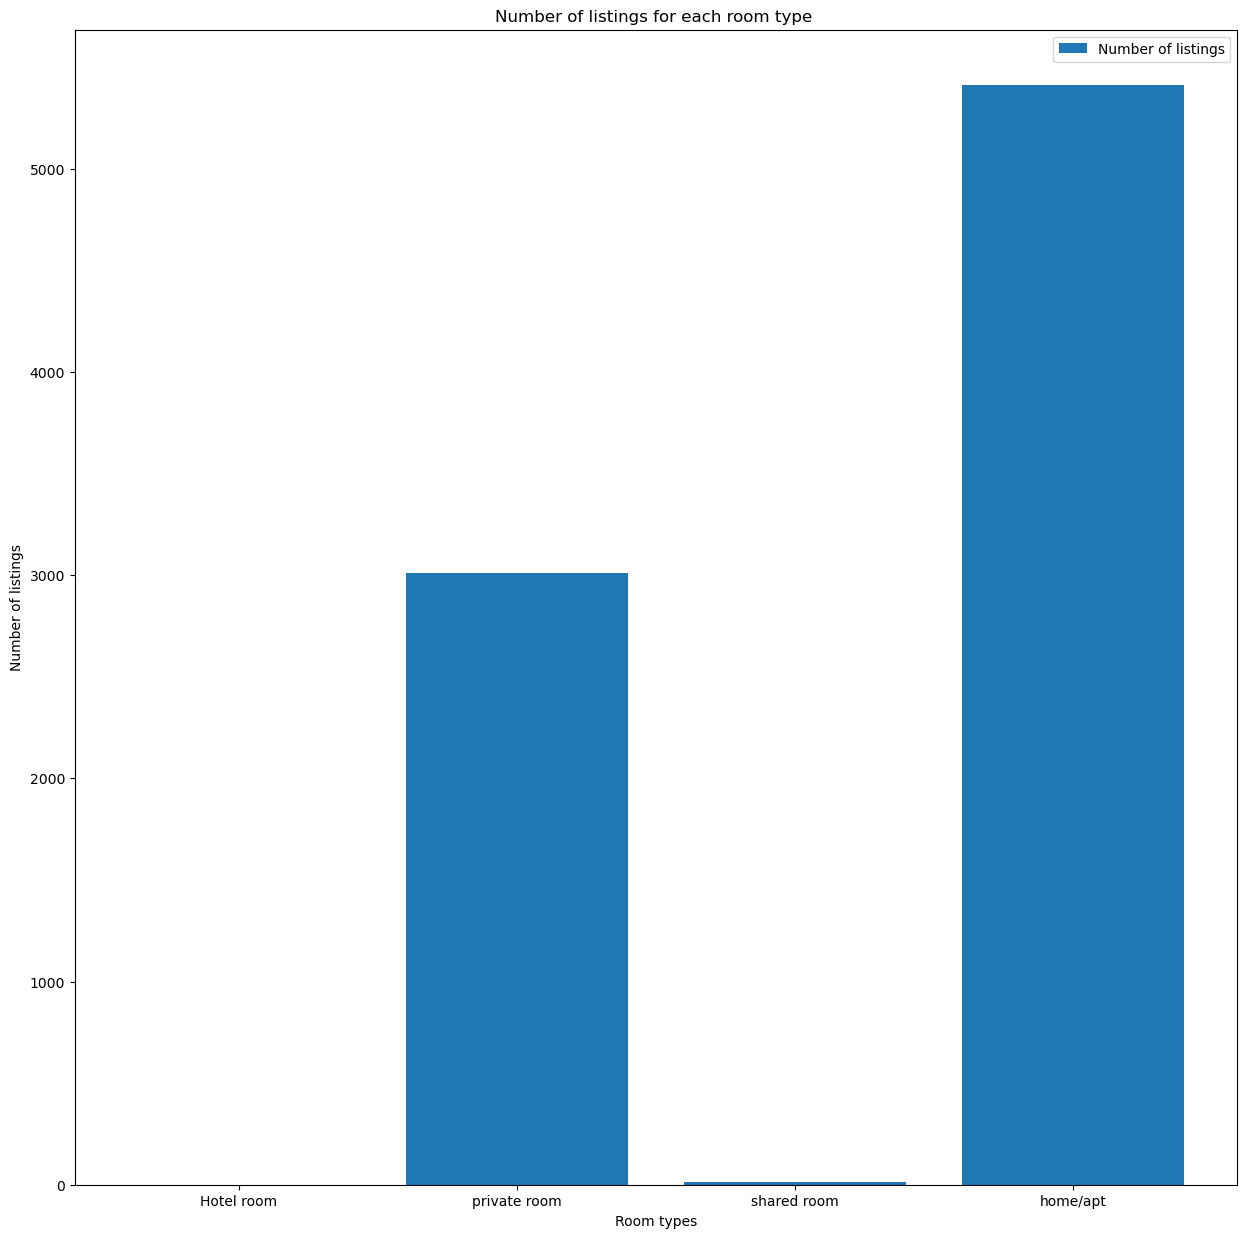

In [8]:
x = ['Hotel room','private room','shared room','home/apt'] # x axis
y = [1,3010,14,5414] # y axis - height of bar chart

fig = plt.figure(figsize=(15,15)) 

plt.bar(x,y, label="Number of listings")# plotting the graph

plt.xlabel("Room types") # create a label for x-axis
plt.ylabel("Number of listings") # create a label for y-axis

plt.title("Number of listings for each room type ") # create a title for your graph 

plt.legend() # create a legend

plt.show() # show the graph

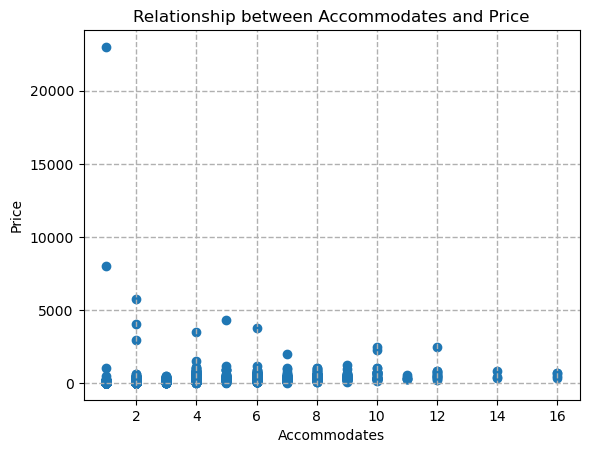

In [9]:


plt.scatter(df['accommodates'], df['price'])
plt.title('Relationship between Accommodates and Price')
plt.xlabel('Accommodates')
plt.ylabel('Price')
plt.grid(True, linewidth= 1, linestyle="--") 
plt.show()


In [10]:


# convert the date column to datetime
df['date'] = pd.to_datetime(df['date'])

# filter data by year
df_2019 = df[df['date'].dt.year == 2019]
df_2020 = df[df['date'].dt.year == 2020]
df_2021 = df[df['date'].dt.year == 2021]
df_2022 = df[df['date'].dt.year == 2022]

# create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

# plot data for each year
axes[0,0].plot(df_2019['date'], df_2019['price'])
axes[0,0].set_title('Airbnb Prices in 2019')
axes[0,0].set_xlabel('Date')
axes[0,0].set_ylabel('Price')

axes[0,1].plot(df_2020['date'], df_2020['price'])
axes[0,1].set_title('Airbnb Prices in 2020')
axes[0,1].set_xlabel('Date')
axes[0,1].set_ylabel('Price')

axes[1,0].plot(df_2021['date'], df_2021['price'])
axes[1,0].set_title('Airbnb Prices in 2021')
axes[1,0].set_xlabel('Date')
axes[1,0].set_ylabel('Price')

axes[1,1].plot(df_2022['date'], df_2022['price'])
axes[1,1].set_title('Airbnb Prices in 2022')
axes[1,1].set_xlabel('Date')
axes[1,1].set_ylabel('Price')

plt.tight_layout()
plt.show()


KeyError: 'date'

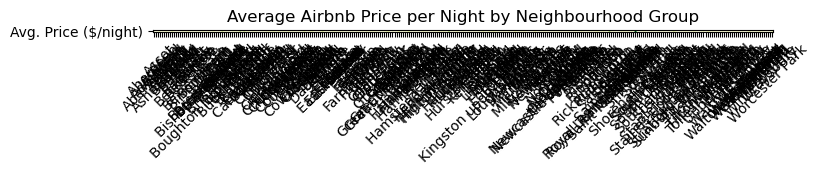

In [11]:


# group the data by neighbourhood group and calculate the mean price
price_by_neighbourhood = df.groupby('host_location')['price'].mean()

# create the plot
fig, ax = plt.subplots(figsize=(8, 8))

# plot the heatmap using imshow
ax.imshow([price_by_neighbourhood.values], cmap='YlGn')

# set the x-ticks and labels
ax.set_xticks(range(len(price_by_neighbourhood)))
ax.set_xticklabels(price_by_neighbourhood.index, rotation=45)

# set the y-ticks and label
ax.set_yticks([0])
ax.set_yticklabels(['Avg. Price ($/night)'])

# set the title
ax.set_title('Average Airbnb Price per Night by Neighbourhood Group')

# show the plot
plt.show()


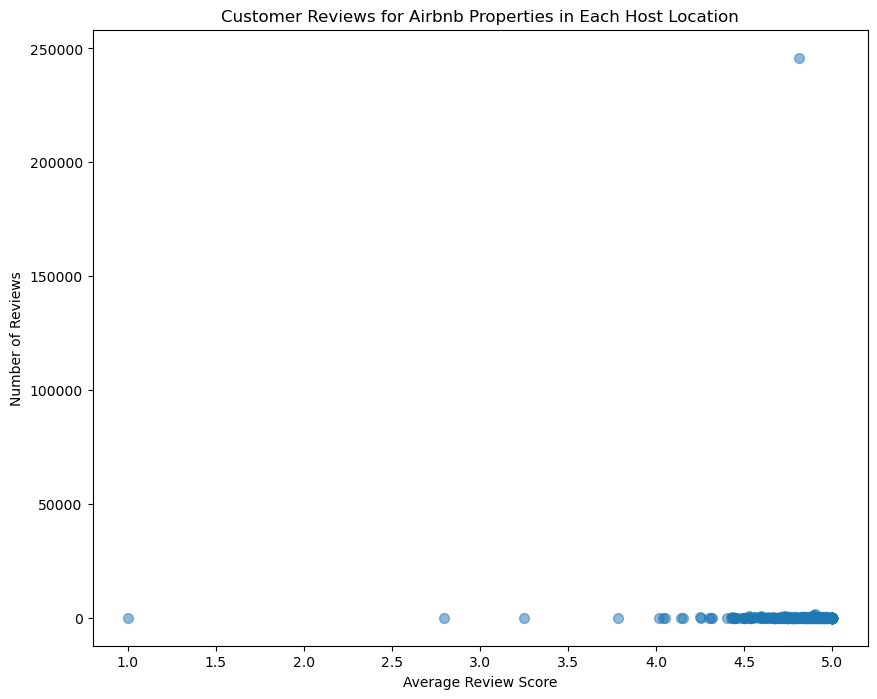

In [13]:


# Group by host location and calculate average review score and number of reviews
location_reviews = df.groupby('host_location').agg({'number_of_reviews': 'sum', 'review_scores_rating': 'mean'}).reset_index()
location_reviews = location_reviews.rename(columns={'review_scores_rating': 'avg_review_score'})

# Plot scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(x=location_reviews['avg_review_score'], y=location_reviews['number_of_reviews'], s=50, alpha=0.5)
plt.xlabel('Average Review Score')
plt.ylabel('Number of Reviews')
plt.title('Customer Reviews for Airbnb Properties in Each Host Location')
plt.show()


In [ ]:


# Group the data by neighborhood and calculate the mean review score
avg_review_scores = df.groupby('host_location')['review_scores_rating'].mean().sort_values()

# Create the plot
fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(avg_review_scores.index, avg_review_scores.values)

# Set the axis labels and title
ax.set_xlabel('Average Review Score')
ax.set_ylabel('Neighborhood')
ax.set_title('Average Review Score by Neighborhood in NYC')

plt.show()


Enter host location: london


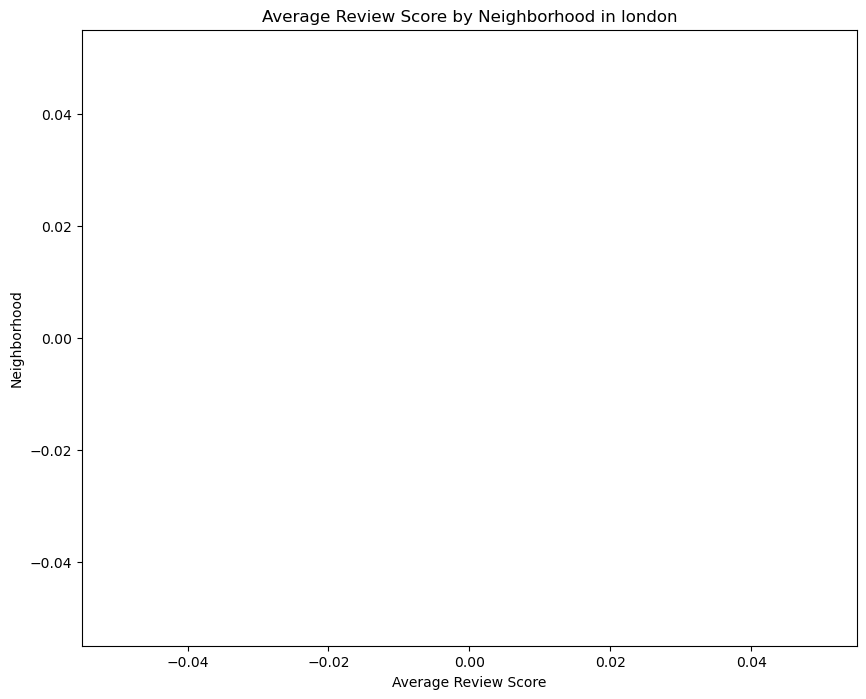

In [5]:
# Prompt user for input
host_location = input("Enter host location: ").lower()

# Filter data by host location
df_filtered = df[df['host_location'] == host_location]

# Group the data by neighborhood and calculate the mean review score
avg_review_scores = df_filtered.groupby('host_location')['review_scores_rating'].mean().sort_values()

# Create the plot
fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(avg_review_scores.index, avg_review_scores.values)

# Set the axis labels and title
ax.set_xlabel('Average Review Score')
ax.set_ylabel('Neighborhood')
ax.set_title('Average Review Score by Neighborhood in ' + host_location)

plt.show()


KeyError: 'England'

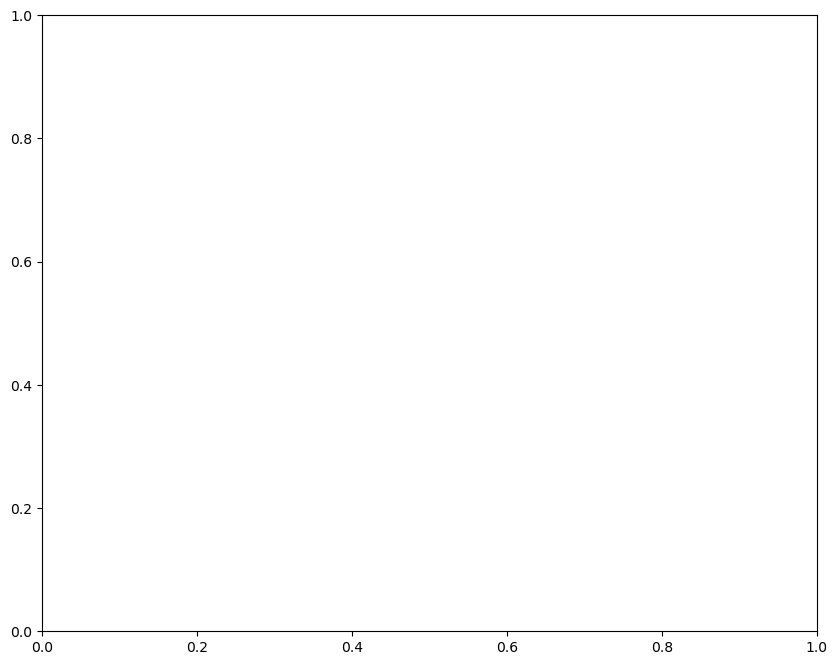

In [6]:


# Group the data by host location and calculate the mean review score and host_since_year
df['host_since_year'] = pd.DatetimeIndex(df['host_since']).year
avg_review_scores = df.groupby('host_location')['review_scores_rating'].mean()
host_since_years = df.groupby('host_location')['host_since_year'].mean()

# Create the plot
fig, ax = plt.subplots(figsize=(10, 8))
colors = {'England': 'red', 'Scotland': 'blue', 'Wales': 'green', 'Northern Ireland': 'purple'}
for location in colors.keys():
    indices = (df['host_location'] == location)
    ax.scatter(host_since_years[location], avg_review_scores[location], color=colors[location], label=location)

# Set the axis labels and title
ax.set_xlabel('Host Since Year')
ax.set_ylabel('Average Review Score')
ax.set_title('Average Review Score by Host Since Year and Location')

# Add a legend
ax.legend()

plt.show()


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

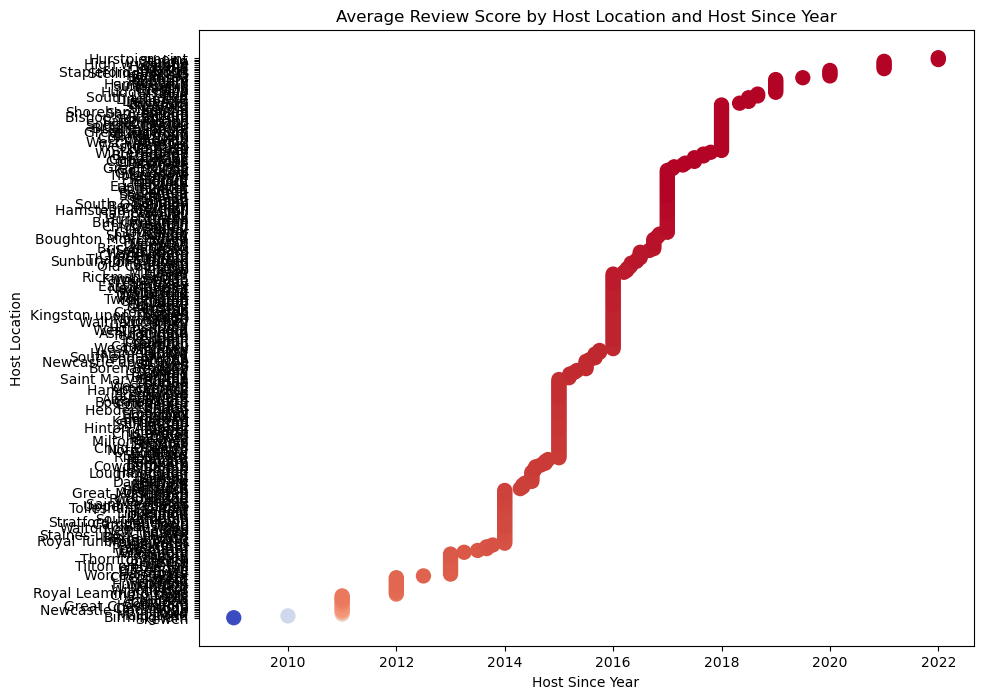

In [7]:


# Clean the host since column
df['host_since'] = pd.to_datetime(df['host_since']).dt.year

# Group the data by host location and calculate the mean review score and host since year
avg_review_scores = df.groupby('host_location')['review_scores_rating'].mean().sort_values()
avg_host_since = df.groupby('host_location')['host_since'].mean().sort_values()

# Create the plot
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(avg_host_since.values, avg_review_scores.index, s=100, c=avg_review_scores.values, cmap='coolwarm')

# Set the axis labels and title
ax.set_xlabel('Host Since Year')
ax.set_ylabel('Host Location')
ax.set_title('Average Review Score by Host Location and Host Since Year')

# Add a colorbar
cbar = plt.colorbar()
cbar.set_label('Average Review Score')

plt.show()


KeyError: 2019

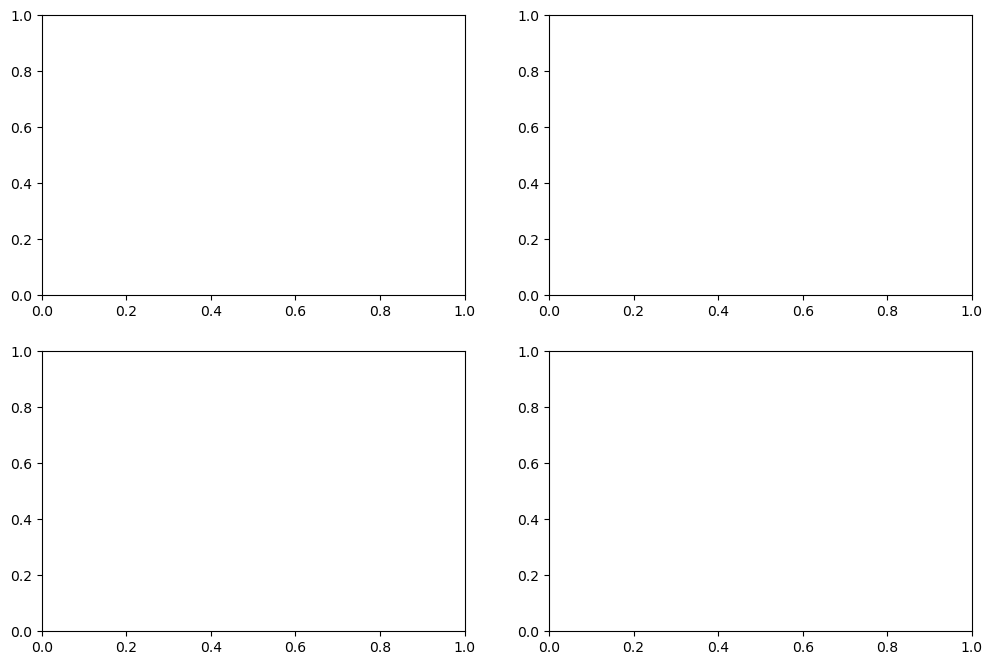

In [9]:


# Convert host_since column to datetime
df['host_since'] = pd.to_datetime(df['host_since'])

# Extract the year from host_since column and create a new column
df['year'] = df['host_since'].dt.year

# Group the data by year and calculate the average price
avg_prices = df.groupby('year')['price'].mean()

# Create subplots for each year
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot the data for each year
for i, year in enumerate(range(2019, 2023)):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    data = avg_prices.loc[year]
    ax.plot(data.index, data.values)
    ax.set_title(f'Airbnb Prices in {year}')
    ax.set_xlabel('Month')
    ax.set_ylabel('Price ($)')

plt.tight_layout()
plt.show()


Enter location: London


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

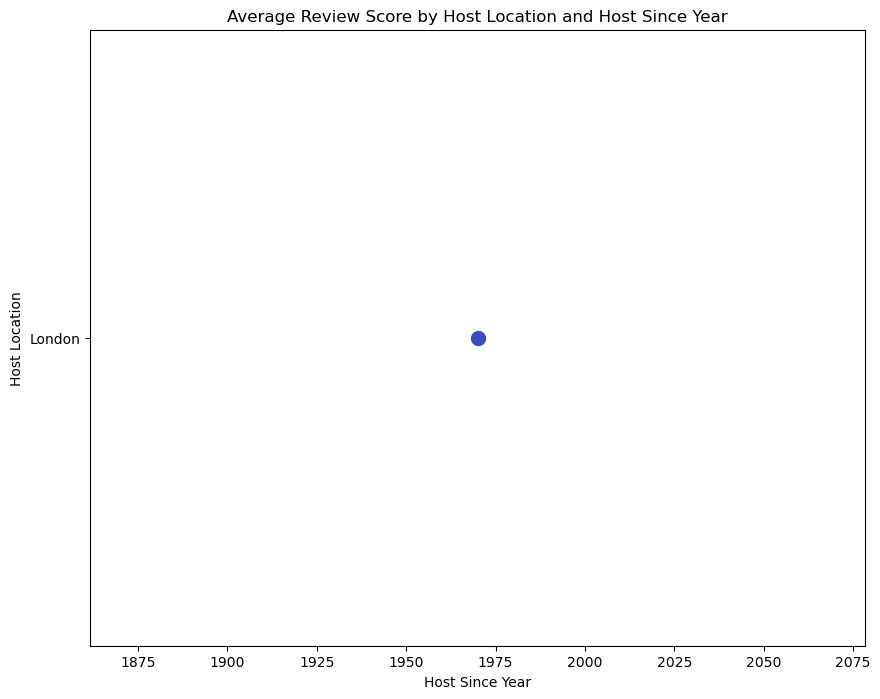

In [10]:
# Get user input for location
location = input("Enter location: ")

# Clean the host since column
df['host_since'] = pd.to_datetime(df['host_since']).dt.year

# Filter data by location
filtered_df = df[df['host_location'] == location]

# Group the filtered data by host location and calculate the mean review score and host since year
avg_review_scores = filtered_df.groupby('host_location')['review_scores_rating'].mean().sort_values()
avg_host_since = filtered_df.groupby('host_location')['host_since'].mean().sort_values()

# Create the plot
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(avg_host_since.values, avg_review_scores.index, s=100, c=avg_review_scores.values, cmap='coolwarm')

# Set the axis labels and title
ax.set_xlabel('Host Since Year')
ax.set_ylabel('Host Location')
ax.set_title('Average Review Score by Host Location and Host Since Year')

# Add a colorbar
cbar = plt.colorbar()
cbar.set_label('Average Review Score')

plt.show()
